# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
df.loc[df['APGAR5'] <= 3, 'APGAR5_cat'] = 'asfixia grave'
df.loc[(df['APGAR5'] > 3) & (df['APGAR5'] < 6),
           'APGAR5_cat'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] < 8),
           'APGAR5_cat'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8), 'APGAR5_cat'] = 'normal'

In [4]:
df['APGAR5_cat']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: APGAR5_cat, Length: 27028, dtype: object

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

([0, 1, 2, 3],
 [Text(0, 0, 'normal'),
  Text(1, 0, 'asfixia leve'),
  Text(2, 0, 'asfixia grave'),
  Text(3, 0, 'asfixia moderada')])

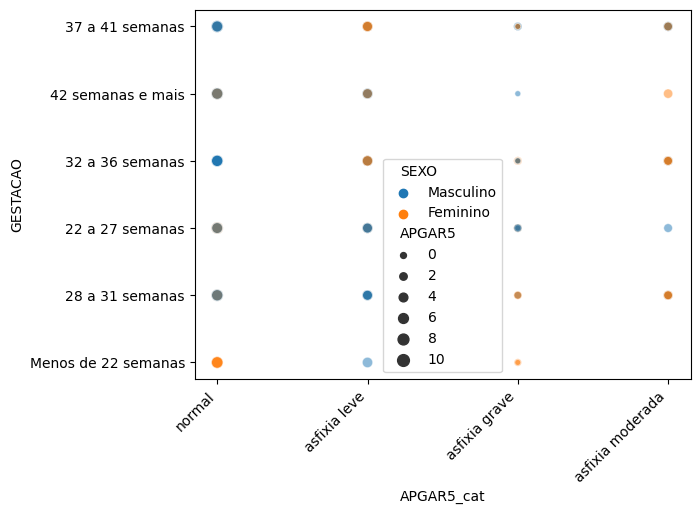

In [34]:
sns.scatterplot(x = 'APGAR5_cat'
                , y = 'GESTACAO'
                , data = df
                , alpha = .5
                , hue='SEXO'
                ,size='APGAR5'

               )
# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45, ha='right')


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [38]:
# Tabela cruzada
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [39]:
# distribuição da variável APGAR5 para cada classe de GESTACAO
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin


APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

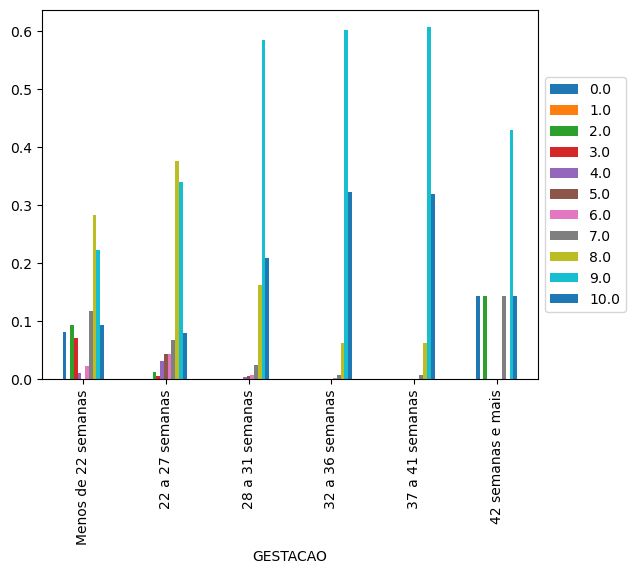

In [43]:
freq_pctlin.plot.bar()
custom_order=['Menos de 22 semanas','22 a 27 semanas','28 a 31 semanas','32 a 36 semanas','37 a 41 semanas','42 semanas e mais']
# Set the x-axis labels based on the custom order
plt.xticks(ticks=range(len(custom_order)), labels=custom_order)

# Definir a posição da legenda fora do gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#sim corrobora

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Text(0, 0.5, 'Peso do Bebê')

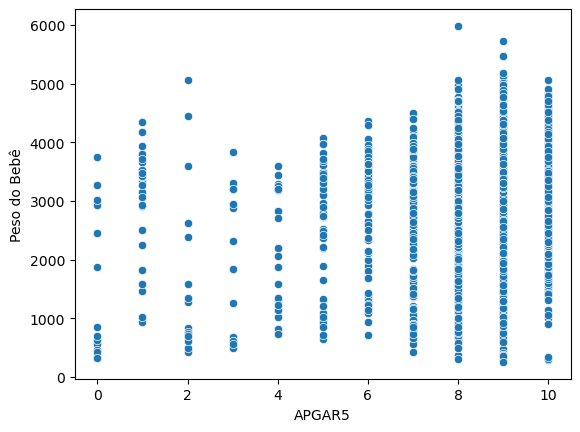

In [44]:
# Gráfico de dispersão
sns.scatterplot(x='APGAR5', y='PESO', data=df)

# Rótulos dos eixos x e y
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê')



<Axes: xlabel='APGAR5', ylabel='PESO'>

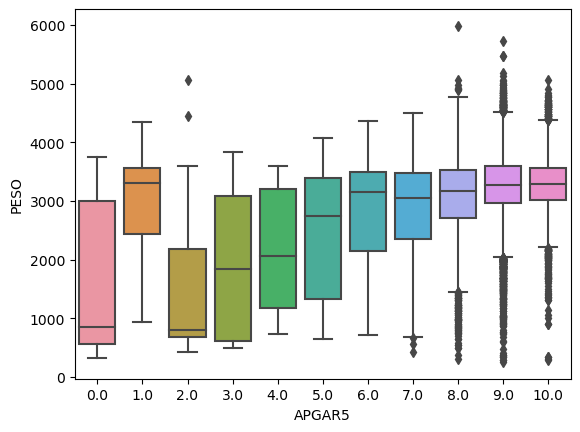

In [45]:
sns.boxplot(x='APGAR5', y='PESO', data=df)

